In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as np
import matplotlib.pyplot as plt

**Note** Tensor data type is one of three big errors you'll ru into with PyTorch and DL
1. Tensor not right data type
2. Tensor not right shape
3. Tensor not on right device

In [2]:
float_32_tensor = torch.tensor([3.0, 6.0, 9.0], dtype=None, device=None, requires_grad=False)
float_32_tensor

tensor([3., 6., 9.])

In [3]:
float_16_tensor = float_32_tensor.type(torch.half)
float_16_tensor

tensor([3., 6., 9.], dtype=torch.float16)

In [4]:
float_64_tensor = float_32_tensor.type(torch.double)
float_64_tensor

tensor([3., 6., 9.], dtype=torch.float64)

In [5]:
tensor_new = float_16_tensor * float_32_tensor
tensor_new

tensor([ 9., 36., 81.])

In [6]:
int_32_tensor = torch.tensor([3, 6, 9], dtype=torch.int64)
int_32_tensor

tensor([3, 6, 9])

In [7]:
float_32_tensor * int_32_tensor

tensor([ 9., 36., 81.])

### Getting information from tensors

1. Tensor not right data type - to get 'dtype' from tensor, can use tensor.dtype    
2. Tensor not right shape - to get 'shape' from tensor, can use tensor.shape
3. Tensor not on right device - to get device, can use tensor.device    

In [8]:
# create tensor
some_tensor = torch.rand(3,4, device='mps')
some_tensor

tensor([[0.3921, 0.2477, 0.3440, 0.2817],
        [0.2920, 0.8312, 0.7039, 0.2901],
        [0.2639, 0.4540, 0.4383, 0.6114]], device='mps:0')

In [9]:
print(f"Datatype of tensor: {some_tensor.dtype}")
print(f"Shape of tensor: {some_tensor.shape}")
print(f"Device of tensor: {some_tensor.device}")

Datatype of tensor: torch.float32
Shape of tensor: torch.Size([3, 4])
Device of tensor: mps:0


In [10]:
print(some_tensor)

tensor([[0.3921, 0.2477, 0.3440, 0.2817],
        [0.2920, 0.8312, 0.7039, 0.2901],
        [0.2639, 0.4540, 0.4383, 0.6114]], device='mps:0')


### Mainpulating Tensors (tensor operations), incl
* Addition
* Subtraction
* Multiplication (element-wise)
* Division
* Matrix Multiplication

In [11]:
tensor = torch.tensor([1,2,3])
tensor + 10
torch.add(tensor, 10)


tensor([11, 12, 13])

### Matrix multiplication in NN and DL:
1. Element wise
2. Matrix multiplication (Most common operation) (Dot product)

Two main rules that performing matrix mult need to satisfy:
1. **Inner Dimensions** need to match
* `(3,2) @ (3, 2)` will not work
* `(3,2) @ (2,3)` will work
2. Resulting matrix have shape of **outer dimensions**

In [12]:
# element wise
tensor

tensor([1, 2, 3])

In [13]:
print(tensor * tensor)
print(f"Equals : {tensor * tensor}")

tensor([1, 4, 9])
Equals : tensor([1, 4, 9])


In [14]:
# matrix mul
torch.matmul(tensor, tensor)

tensor(14)

In [15]:
torch.matmul(torch.rand(3,2), torch.rand(3,2))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (3x2 and 3x2)

In [17]:
tensor_A = torch.tensor([[1,2], [3,4], [5,6]])

tensor_B = torch.tensor([[7,10],[8,11],[9,12]])

torch.mm(tensor_A, tensor_B) #tensor.mm is torch.matmul (alias for writing less code)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (3x2 and 3x2)

To fix our tensor shape issues, we can manipulate shape of one of our tensors using a **Transpose**

In [18]:
tensor_B.T

tensor([[ 7,  8,  9],
        [10, 11, 12]])

In [19]:
tensor_B

tensor([[ 7, 10],
        [ 8, 11],
        [ 9, 12]])

In [20]:
torch.mm(tensor_A, tensor_B.T)

tensor([[ 27,  30,  33],
        [ 61,  68,  75],
        [ 95, 106, 117]])

## Finding min, max, mean, sum, etc (tensor aggregation)

In [21]:
# Create tensor
x= torch.arange(1,100,10)
x, x.dtype

(tensor([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91]), torch.int64)

In [22]:
torch.min(x), x.min(), torch.max(x), x.max()

(tensor(1), tensor(1), tensor(91), tensor(91))

In [23]:
#find the right data type whenfinding mean, torch.mean() needs tensor of float32 datatype
torch.mean(x.type(torch.float32)), x.type(torch.float32).mean()

(tensor(46.), tensor(46.))

In [24]:
torch.sum(x), x.sum()

(tensor(460), tensor(460))

In [25]:
x[x.argmin()] #find position in tensor that has minimum value with argmin() -> returns position of target tensor where minimum tensor occurs

tensor(1)

In [26]:
x[x.argmax()]

tensor(91)

## Reshaping, stacking, squeezing and unsqueezing tensors
* Reshaping - reshapes an input tensor to a defined shape
* View - Return a view of an input tensor of certainn shape but keep the same memory as the original tensor
* Stacking - combine multiple tensors on top of each otehr (Vstack) or side by side(hstack)
* Squeeze - remove all  `1` dimensions from a tensor
* Unsqeueeze - add a `1` dimensions to a target tensor
* Permute - Return a view of the input with dimensions permuted (swapped) in a certain way


In [27]:
x = torch.arange(1., 10.)
x,x.shape

(tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.]), torch.Size([9]))

In [28]:
# Add an extra dimension
x_reshaped = x.reshape(1,9)
x_reshaped

tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]])

In [29]:
# Change the view
z = x.view(1,9) #z shares same memory
z, z.shape

(tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]]), torch.Size([1, 9]))

In [30]:
# Changing z changes x (same memorY)
z[:, 0] = 5
z, x

(tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]]),
 tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.]))

In [31]:
# Stack tensors on top of each other
x_stacked = torch.stack([x,x,x,x], dim=0)
x_stacked

tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.],
        [5., 2., 3., 4., 5., 6., 7., 8., 9.],
        [5., 2., 3., 4., 5., 6., 7., 8., 9.],
        [5., 2., 3., 4., 5., 6., 7., 8., 9.]])

In [32]:
print(f"Previous tensor: {x_reshaped}")
print(f"PRevious shape: {x_reshaped.shape}")

x_squeezed = x_reshaped.squeeze()
print(f"\nNew tensor: {x_squeezed}")
print(f"New Shape: {x_squeezed.shape}")

Previous tensor: tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]])
PRevious shape: torch.Size([1, 9])

New tensor: tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.])
New Shape: torch.Size([9])


In [33]:
# squeezing
x = torch.zeros(2,1,2,1,2)
x.size()

torch.Size([2, 1, 2, 1, 2])

In [34]:
y = torch.squeeze(x)
y.size()

torch.Size([2, 2, 2])

In [35]:
y = torch.squeeze(x, 0)
y.size()

torch.Size([2, 1, 2, 1, 2])

In [36]:
y = torch.squeeze(x,2)
y.size()

torch.Size([2, 1, 2, 1, 2])

In [37]:
#torch.unsqueeze() - adds a single dimension to a target tensor at specific dim
print(f"Previous traget: {x_squeezed}")
print(f"Previous shape: {x_squeezed.shape}")

x_unsqueezed = x_squeezed.unsqueeze(dim=0)
print(f"\nNew tensor: {x_unsqueezed}")
print(f"\nNew shape: {x_unsqueezed.shape}")

Previous traget: tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.])
Previous shape: torch.Size([9])

New tensor: tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]])

New shape: torch.Size([1, 9])


In [38]:
# torch.permute - rearranges the dimensions of a target tensor in specified order
'''x = torch.randn(2,3,5)
x.size()
torch.permute(x, (2,0,1)).size()'''
x_original = torch.rand(size=(224,224,3)) # [heigh, width, color_channels]

# Permute the original tensor to rearrange the axis (or dim) order
x_permuted = x_original.permute(2,0,1) # shifts axis 0->1, 1->2, 2->0
print(f"Previous shape: {x_original.shape}")
print(f"New shape: {x_permuted.shape}")

Previous shape: torch.Size([224, 224, 3])
New shape: torch.Size([3, 224, 224])


In [39]:
x_original

tensor([[[0.1387, 0.9634, 0.0181],
         [0.6617, 0.9420, 0.8988],
         [0.4923, 0.1141, 0.1927],
         ...,
         [0.3614, 0.3281, 0.9827],
         [0.0710, 0.0337, 0.8654],
         [0.4969, 0.5608, 0.5449]],

        [[0.8817, 0.8582, 0.3788],
         [0.7773, 0.3738, 0.7883],
         [0.6641, 0.5085, 0.5675],
         ...,
         [0.5881, 0.1770, 0.0831],
         [0.6916, 0.7165, 0.3140],
         [0.7511, 0.8895, 0.3524]],

        [[0.1276, 0.7204, 0.6738],
         [0.3601, 0.4188, 0.3362],
         [0.1609, 0.1414, 0.9990],
         ...,
         [0.3402, 0.4196, 0.5610],
         [0.0871, 0.3817, 0.6546],
         [0.8432, 0.2711, 0.2134]],

        ...,

        [[0.7493, 0.3795, 0.7565],
         [0.4071, 0.6520, 0.5718],
         [0.2775, 0.8733, 0.3270],
         ...,
         [0.4194, 0.6817, 0.4045],
         [0.5091, 0.4685, 0.8609],
         [0.7939, 0.3502, 0.2682]],

        [[0.7060, 0.2705, 0.8242],
         [0.1664, 0.2146, 0.9098],
         [0.

In [40]:
x_original[0, 0, :]

tensor([0.1387, 0.9634, 0.0181])

In [41]:
x_original[0,1,2] = 728218

In [42]:
x_permuted[2,0,1]

tensor(728218.)

## Indexing (selecting data from tensors)
Indexing with PyTorch is similar to indexing with NumPy

In [43]:
import torch
x = torch.arange(1, 10).reshape(1,3,3)
x, x.shape

(tensor([[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]),
 torch.Size([1, 3, 3]))

In [44]:
# index on our new tensor
x[0]

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [45]:
# index on the middle bracket
x[0,1], x[0][1]

(tensor([4, 5, 6]), tensor([4, 5, 6]))

In [46]:
# index on the most inner bracket (last dimension)
x[0][2][2]
# you can also use ":" to select all of a target dimension
x[:, 0]

tensor([[1, 2, 3]])

In [47]:
# get all values of 0th and 1st dimensions, but only index 1 of 2nd dimension
x[:, :, 1]

tensor([[2, 5, 8]])

In [48]:
x[:, 1, 1]

tensor([5])

In [49]:
# index on x to return 9, index on x to return 369

x[0,2,2],  x[:, :, 2]

(tensor(9), tensor([[3, 6, 9]]))

### PyTorch tensors with NumPy
NumPy is a popular scientific Python numerical computing library. Thus, PyTorch has functionality to interact with it.
* Data in NumPy, want in PyTorch Tensor `torch.from_numpy(ndarray)`
* PyTorch tensor -> NumPy -> `torch.Tensor.numpy()`

In [50]:
import torch
import numpy as np

array = np.arange(1.0, 8.0)
tensor = torch.from_numpy(array)
array, tensor

(array([1., 2., 3., 4., 5., 6., 7.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

In [51]:
array.dtype, tensor.dtype   

(dtype('float64'), torch.float64)

In [52]:
torch.arange(1.0, 8.0).dtype

torch.float32

In [53]:
tensor = torch.from_numpy(array).type(torch.float32)

In [54]:
tensor.dtype # pytorch reflects numpy's default datatype of float64 unless states otherwise

torch.float32

In [55]:
# Change value of array, what will this do to `tensor`

array = array + 1
array, tensor

(array([2., 3., 4., 5., 6., 7., 8.]), tensor([1., 2., 3., 4., 5., 6., 7.]))

In [56]:
# Tensor to NumPy array
tensor = torch.ones(7)
numpy_tensor = tensor.numpy()
tensor, numpy_tensor

(tensor([1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

In [57]:
#change the tensor, what happens to `numpy_tensor`?
tensor = tensor + 1
tensor, numpy_tensor

(tensor([2., 2., 2., 2., 2., 2., 2.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

## Reproducibility (trying to take random out of random)

In short, how a NN learns:

`start with random numbers -> tensor operations -> update random numbers to try and make them better representations of the data -> again -> again...`

To reduce the randomness in neural networks and PyTorch comes the concept of a **random seed**.

Essentially what the random seed does is "flavour" the randomness.

In [58]:
import torch
random_tensor_A = torch.rand(3,4)
random_tensor_B = torch.rand(3,4)

print(random_tensor_A)
print(random_tensor_B)
print(random_tensor_A == random_tensor_B)

tensor([[0.2619, 0.4731, 0.8398, 0.2610],
        [0.3918, 0.7840, 0.0112, 0.6115],
        [0.4252, 0.9891, 0.8964, 0.3429]])
tensor([[0.9859, 0.5818, 0.4292, 0.0249],
        [0.4091, 0.0818, 0.3526, 0.3342],
        [0.4716, 0.6852, 0.5217, 0.2006]])
tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])


In [59]:
# Let's make some random but reproducible tensors
import torch

# Set the random seed
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)
random_tensor_C = torch.rand(3,4)
torch.manual_seed(RANDOM_SEED)
random_tensor_D = torch.rand(3,4)
print(random_tensor_C)
print(random_tensor_D)
print(random_tensor_C == random_tensor_D)

tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])


## Running tensors and PyTorch objects on the GPUs (making faster computations)

### 1. Getting a GPU

1. Easiest - Google Colab
2. Use own GPU - takes setup and requires investment
3. Use cloud computing - GCP, AWS, Azure, these services allow you to rent computers on the cloud and access them

For 2,3 PyTorch + GPU drivers (CUDA) takes a little bit of setting up, refer to pytorch 

In [60]:
device = "mps" if torch.mps.is_available() else "cpu"
print(f"Using device: {device}")
torch.cuda.is_available()

Using device: mps


False

In [61]:
torch.cuda.device_count()

0

 ### 3. Putting tensors (and models) on the GPU

In [62]:
tensor = torch.tensor([1,2,3], device="cpu")
print(tensor, tensor.device)


tensor([1, 2, 3]) cpu


In [63]:
device = "cuda" if torch.cuda.is_available() else "mps"
tensor_on_gpu = tensor.to(device)
tensor_on_gpu


tensor([1, 2, 3], device='mps:0')

### 4. Moving tensors back to the CPU (NumPy e.g. only works on CPU)

In [64]:
# If tensor is on GPU, can't transform to NumPy
tensor_on_gpu.numpy()

TypeError: can't convert mps:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

In [65]:
tensor_on_cpu = tensor_on_gpu.to("cpu")

In [66]:
tensor_on_cpu.numpy()

array([1, 2, 3])

In [67]:
 tensor_on_gpu

tensor([1, 2, 3], device='mps:0')

Ch1: 48–49, 51, 54 (epoch loops, test loop, save/load, put together).

Ch4: 137, 139, 142, 143, 148 (custom Dataset, DataLoader, augmentation/transforms mindset, reusable train/test functions).
Ch2: 69–71, 73/88 (skim) (logits→probs→labels, eval patterns, troubleshooting).

If images might appear: Ch3 95–103, 105 (torchvision + batched loops).

## Splitting data into training and test sets ✨✨

In [68]:
weight = 0.7
bias = 0.3

start = 0
end =1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y= weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [69]:
len(X), len(y)

(50, 50)

In [70]:
train_split = int(0.8*len(X))

train_split

40

In [71]:
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(X_test)

(40, 10)

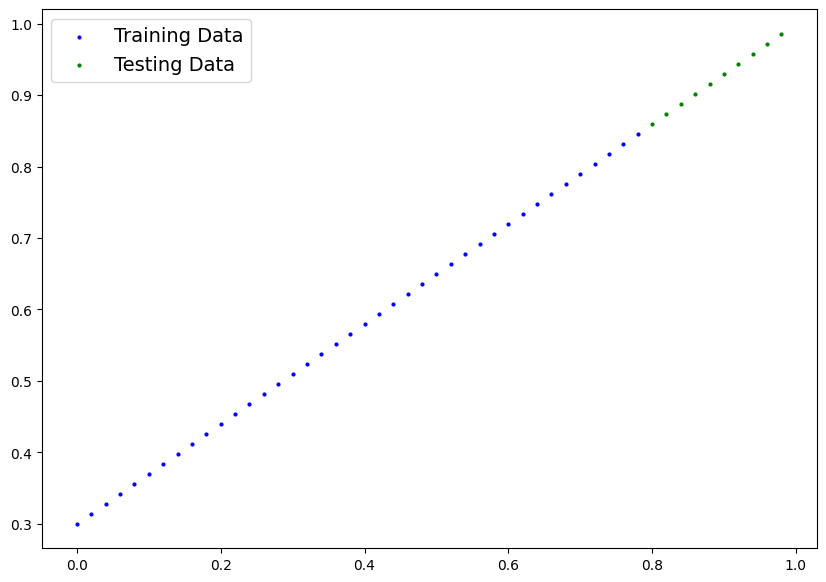

In [72]:
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels = y_test, predictions=None):
    """
    Plots training data, test data and compares predictions.
    """
    plt.figure(figsize=(10,7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label = "Training Data")
    plt.scatter(test_data, test_labels, c = "g", s=4, label = "Testing Data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c = "r", label = "Predictions")
    plt.legend(prop = {"size" : 14})

plot_predictions()

## 2. build model

* Start with random values (weight and bias)
* Look at traning data and adjust the random values to better represent the ideal values (parameter to recreate the data)

How
1. Gradient Descent
2. Backpropagation

In [73]:
class LinearRegressionModel(nn.Module): # <- almost everything in Pytorch inherits from nn.Module
    """
    All models should subclass the nn.Module class
    """
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.rand(1, requires_grad=True, dtype = torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype = torch.float))

        # Forward method to define computation in the model
    
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
        return self.weights * x + self.bias # linear regression formula    

- nn.Module
- Gradient Descent + Backpropagation (3blue1brown)

### PyTorch model building essentials

* torch.nn - contains all of buildings for computational graphs (e.g. Neural Networks)
* torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us
* torch.nn.Module - The base class for all neural network modules, if you subclass it, you should overwrite forward()
* torch.optim - this where the optimizers in PyTorch live, they will help with gradient descent
* def forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation

## 1. Get Data ready (turn into tensors)
* torchvision.transforms
* torch.utils.data.Dataset
* torch.utils.darta.DataLoader
## 2. Pick a model
* torch.nn
* torch.nn.Module
* torchvision.models

* torch.optim

## 3. Fit model to data and make prediction
## 4. Evaluate the model
* torchmetrics
## 5. Improve through experiementaion
* torch.utils.tensorboard
## 6. Save model

### Checking contenst of our PyTorch Model -> Find what's in our model
So we can check our model parameters or what's inside our model using `.parameters()`

In [74]:
# Create a random seed
torch.manual_seed(42)


In [75]:
# Create an instance of the mdoel (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

model_0

LinearRegressionModel()

In [76]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([-0.6382], requires_grad=True)]

In [77]:
torch.randn(1)

tensor([1.3554])

In [78]:
# List named parameteres
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([-0.6382]))])

# Making prediction using `torch.inference_mode()`

To check our model's preditive power, let's see how well it predicts y_test based on x_test
When we pass data through our model, it's going to run it through the forward() method

In [79]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [80]:
# Make predictions using model
with torch.inference_mode(): # disables gradient
    y_preds = model_0(X_test)
y_preds, y_test

(tensor([[0.0677],
         [0.0853],
         [0.1030],
         [0.1206],
         [0.1382],
         [0.1559],
         [0.1735],
         [0.1912],
         [0.2088],
         [0.2265]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [81]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([-0.6382]))])

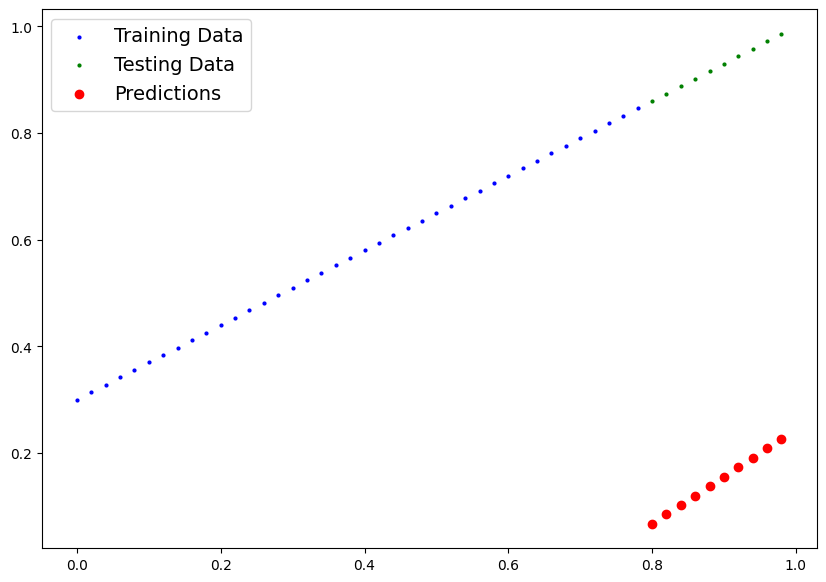

In [82]:
plot_predictions(predictions=y_preds)

### Train model
Training is for a model to move from some *unknown* paremeters (may be random) to some *known* parameters.
In other words from a poor representation to a better presentation.

One way to measure how poor/wrong a model prediction are is to use a loss function

* Note: Loss function may also be called cost function or criterion in different areas

Things we need to train:

* **Loss Function**: A function to measure how wrong your model's predictions are to ideal outputs, lower better
* **Optimizer**: Takes into account loss of model and adjusts the model's parameters (weight and bias in this case) to improve the loss function

For PyTorch, we need:
* A training loop
* A testing loop

In [83]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([-0.6382], requires_grad=True)]

In [84]:
# Check out model parameters
model_0.state_dict()


OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([-0.6382]))])

In [85]:
loss_fn = nn.L1Loss() # how wrong, i.e. MSE
optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.01) # adjusts weights based on loss
# lr = learning rate = possibly the most important hyperparameter = how much the weights/params change

### Building a training loop (and testing loop) in PyTorch

Couple of things needed in training loop:
0. Loop through the data
1. Forward pass (data going through model's `foward()` functions) to make predictions on data - forward propagation
2. Calcualte the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of theparameters of our model with respect to the loss (**back propagation**)
5. Optimizer Step - use the optimizer to adjust model's parameters to try and improve the loss (**gradient descent**)

In [86]:
epochs = 100 # hp

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []


for epoch in range(epochs):
    epoch_count.append(epoch)
    #Put model in training mode
    model_0.train() # sets all parameters that require gradients to require gradients

    # 1. Forward pass
    y_pred = model_0(X_train)

    # 2. Calculate Loss
    loss = loss_fn(y_pred, y_train)
    loss_values.append(loss)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step() # by deafult how optimizer changes will accumulate through the loop, so 
                    # need to zero them above in step 3 for next iteration

    model_0.eval() # turns of different setttings in the model not needed for evalutaion
    with torch.inference_mode():
        # 1. Forward Pass
        test_pred = model_0(X_test)
        # 2. Calculate the loss, same loss function
        test_loss = loss_fn(test_pred, y_test)
        test_loss_values.append(test_loss)
    
    if (epoch)%10 ==0:
        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
        print(model_0.state_dict())


Epoch: 0 | Loss: 0.8670692443847656 | Test loss: 0.7624635696411133
OrderedDict({'weights': tensor([0.8862]), 'bias': tensor([-0.6282])})
Epoch: 10 | Loss: 0.7518593668937683 | Test loss: 0.6277537941932678
OrderedDict({'weights': tensor([0.9252]), 'bias': tensor([-0.5282])})
Epoch: 20 | Loss: 0.636649489402771 | Test loss: 0.4930438995361328
OrderedDict({'weights': tensor([0.9642]), 'bias': tensor([-0.4282])})
Epoch: 30 | Loss: 0.5214396119117737 | Test loss: 0.3583340346813202
OrderedDict({'weights': tensor([1.0032]), 'bias': tensor([-0.3282])})
Epoch: 40 | Loss: 0.4062294363975525 | Test loss: 0.2236236035823822
OrderedDict({'weights': tensor([1.0422]), 'bias': tensor([-0.2282])})
Epoch: 50 | Loss: 0.2910192012786865 | Test loss: 0.08891315758228302
OrderedDict({'weights': tensor([1.0812]), 'bias': tensor([-0.1282])})
Epoch: 60 | Loss: 0.17580901086330414 | Test loss: 0.04579734057188034
OrderedDict({'weights': tensor([1.1202]), 'bias': tensor([-0.0282])})
Epoch: 70 | Loss: 0.111104

Learning rate scheduling - Coin at back of couch

## PLot the loss curves

/var/folders/vl/xcbt_9650nz8tknq733z87640000gn/T/ipykernel_62899/883351134.py:1: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/autograd/generated/python_variable_methods.cpp:836.)
  plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label = "Train Loss")


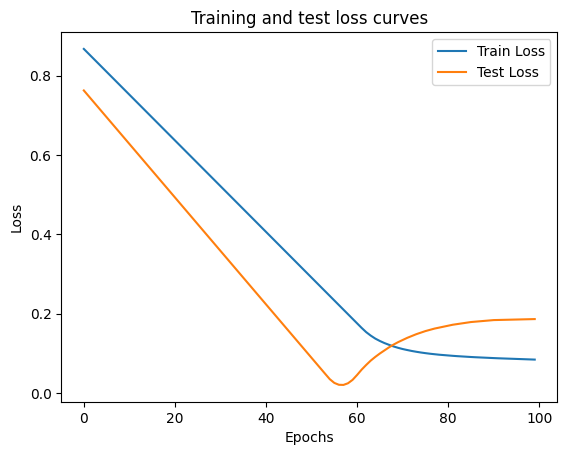

In [87]:
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label = "Train Loss")
plt.plot(epoch_count, test_loss_values, label = "Test Loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [88]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

model_0.state_dict()

OrderedDict([('weights', tensor([1.1143])), ('bias', tensor([0.1178]))])

In [89]:
weight, bias

(0.7, 0.3)

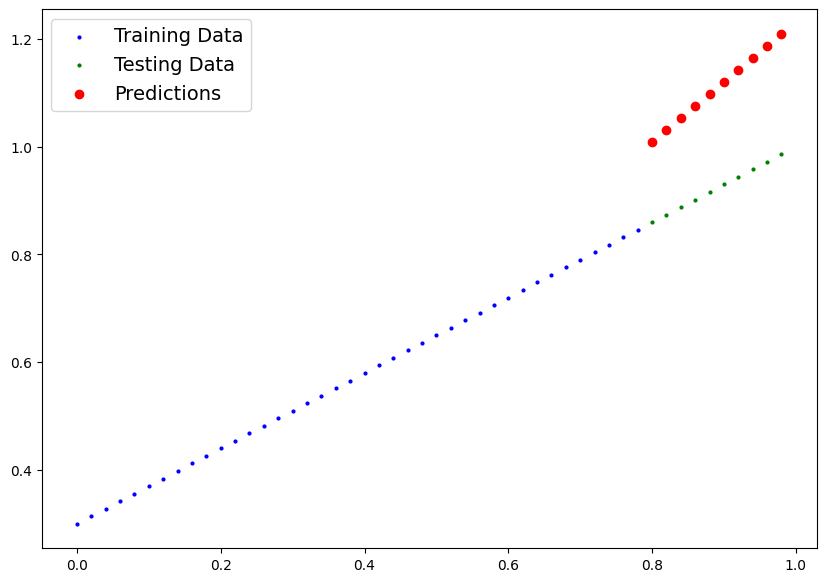

In [90]:
plot_predictions(predictions=y_preds_new)

In [91]:
weight = 0.2
bias = 0.4

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.4000],
         [0.4040],
         [0.4080],
         [0.4120],
         [0.4160],
         [0.4200],
         [0.4240],
         [0.4280],
         [0.4320],
         [0.4360]]))

In [92]:
# split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(X_test)

(40, 10)

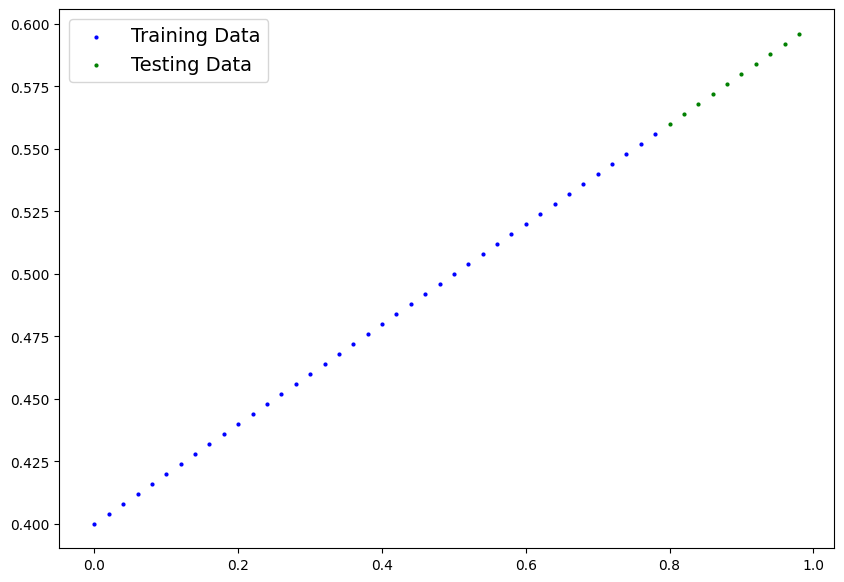

In [93]:
plot_predictions(X_train, y_train, X_test, y_test)

In [94]:
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features = 1, out_features=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

torch.manual_seed(2)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.2294]])),
              ('linear_layer.bias', tensor([-0.2380]))]))

In [95]:
epochs = 200
epoch_count = []
loss_values = []
test_loss_values = []

device = "cpu"

loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr = 0.01)

#put data on same device as model
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    model_1.train()

    y_pred = model_1(X_train)

    loss = loss_fn(y_pred, y_train)
    loss_values.append(loss)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(X_test)

        test_loss = loss_fn(test_pred, y_test)
        test_loss_values.append(test_loss)

    if epoch % 10 ==0:
        print(f"Epoch {epoch} | Loss: {loss} | Test Loss: {test_loss}")

Epoch 0 | Loss: 0.6265121698379517 | Test Loss: 0.5983460545539856
Epoch 10 | Loss: 0.51130211353302 | Test Loss: 0.46363601088523865
Epoch 20 | Loss: 0.39609211683273315 | Test Loss: 0.32892608642578125
Epoch 30 | Loss: 0.28088217973709106 | Test Loss: 0.19421617686748505
Epoch 40 | Loss: 0.1656721830368042 | Test Loss: 0.05950623005628586
Epoch 50 | Loss: 0.06173006445169449 | Test Loss: 0.0627998486161232
Epoch 60 | Loss: 0.04574745148420334 | Test Loss: 0.09309744089841843
Epoch 70 | Loss: 0.04162910580635071 | Test Loss: 0.09382584691047668
Epoch 80 | Loss: 0.03812864050269127 | Test Loss: 0.08830083906650543
Epoch 90 | Loss: 0.03468983247876167 | Test Loss: 0.08002829551696777
Epoch 100 | Loss: 0.03126073628664017 | Test Loss: 0.07244262844324112
Epoch 110 | Loss: 0.027825018391013145 | Test Loss: 0.06417009234428406
Epoch 120 | Loss: 0.024387244135141373 | Test Loss: 0.056584425270557404
Epoch 130 | Loss: 0.020958801731467247 | Test Loss: 0.048311881721019745
Epoch 140 | Loss: 0

In [96]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.2050]])),
             ('linear_layer.bias', tensor([0.3905]))])

In [97]:
weight, bias

(0.2, 0.4)

In [98]:
model_1.eval()
with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds

tensor([[0.5545],
        [0.5586],
        [0.5627],
        [0.5668],
        [0.5709],
        [0.5750],
        [0.5791],
        [0.5832],
        [0.5873],
        [0.5914]])

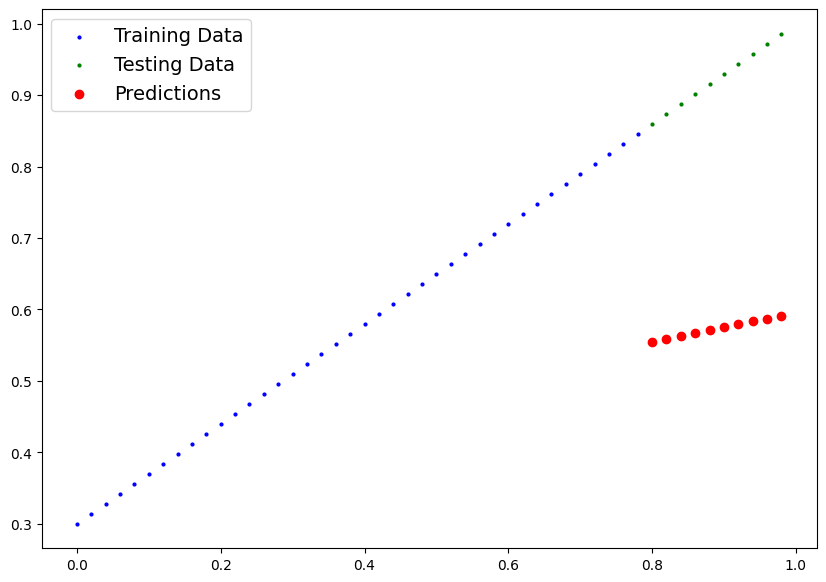

In [99]:
plot_predictions(predictions = y_preds.cpu())

In [100]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the models tate dict
print(f"Saviang model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)

Saviang model to: models/01_pytorch_workflow_model_1.pth


In [101]:
# Load a PyTorch
loaded_model_1 = LinearRegressionModelV2()
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [102]:
next(loaded_model_1.parameters()).device

device(type='cpu')

In [103]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.2050]])),
             ('linear_layer.bias', tensor([0.3905]))])

In [104]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)
y_preds = loaded_model_1_preds
y_preds

tensor([[0.5545],
        [0.5586],
        [0.5627],
        [0.5668],
        [0.5709],
        [0.5750],
        [0.5791],
        [0.5832],
        [0.5873],
        [0.5914]])